In [13]:
import numpy as np
import pandas as pd
from sklearn import *

In [14]:
df_o = pd.read_csv('data2.csv')
df = df_o.copy()

In [15]:
# reduce skew
# area = df['area'].apply(lambda x: np.log(x + np.sqrt(x**2 + 1)))
df['CLASS'] = df_o['CLASS'].apply(lambda x: 0 if x == "no_fire" else 1)
df['CLASS']

0       0
1       0
2       1
3       0
4       0
       ..
1708    0
1709    0
1710    1
1711    0
1712    1
Name: CLASS, Length: 1713, dtype: int64

(array([1327.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         386.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

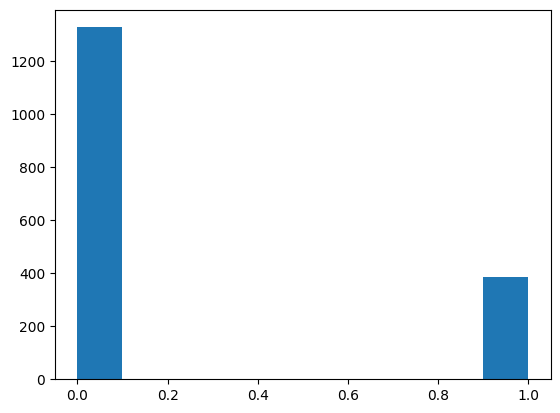

In [16]:
from matplotlib import pyplot as plt

plt.hist(df['CLASS'])

In [17]:
classification = df['CLASS']

In [18]:
parameters = df.drop('CLASS', axis=1)
train_parameters, test_parameters, train_solutions, test_solutions = model_selection.train_test_split(parameters, classification)

In [19]:
linreg = linear_model.LinearRegression()
linreg.fit(train_parameters, train_solutions)
print(linreg.score(train_parameters, train_solutions))

0.11477663379039449


In [20]:
train_solutions_log, train_parameters_log = train_solutions.copy().apply(lambda x: x > 0), train_parameters.copy().apply(lambda x: x > 0)

logreg = linear_model.LogisticRegression()
logreg.fit(train_parameters_log, train_solutions_log)
print(logreg.score(train_parameters_log, train_solutions_log))

0.7725856697819314


In [171]:
# Convert target variable to binary format
train_solutions_rf = train_solutions.apply(lambda x: 1 if x > 0 else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_parameters, train_solutions_rf, test_size=0.20, random_state=42)

# Create a Random Forest classifier model
rf = ensemble.RandomForestClassifier(n_estimators=101, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy} {type(X_test)}")
y_pred


Accuracy: 0.8521400778210116 <class 'pandas.core.frame.DataFrame'>


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [160]:
y_pred = rf.predict(pd.DataFrame(np.array([[0.43879,15208.230769,4.4]])))
y_pred[0]

C:\Users\prane\PycharmProjects\hacktj\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

In [161]:
y_test

88      1
1339    0
100     0
924     0
1641    0
       ..
921     0
387     1
868     0
927     0
455     0
Name: CLASS, Length: 257, dtype: int64

In [162]:
import joblib

In [163]:
joblib.dump(rf, 'my_model.pkl', compress=9)

['my_model.pkl']

In [164]:
import pickle
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

In [56]:
import ee
import geemap
import numpy as np
import pandas as pd

ee.Authenticate()



Successfully saved authorization token.


KeyError: 'longitude'

In [58]:
data

NameError: name 'data' is not defined

In [114]:
import ee

# Initialize Earth Engine API
ee.Initialize()

# Define coordinates of point of interest (e.g. New York City)
lat = 34.3167
lon = -118.0058

# Define date range for NDVI data
start_date = '2022-02-01'
end_date = '2023-02-01'

# Load MODIS NDVI data
modis_NDVI = ee.ImageCollection('MODIS/MOD09GA_006_NDVI').filterDate(start_date, end_date)
modis_LST = ee.ImageCollection('MODIS/061/MOD11A1').filterDate(start_date, end_date)

# Define function to extract NDVI value at point of interest
def get_ndvi_at_point(image):
    ndvi = image.select('NDVI')
    point = ee.Geometry.Point(lon, lat)
    # Check if point intersects with image
    if image.geometry().contains(point):
        value = ndvi.sample(point, 30).first().get('NDVI')
        return ee.Feature(point, {'NDVI': value})
    else:
        return None
    return None

def get_lst_at_point(image):
    lst = image.select('LST_Day_1km')
    point = ee.Geometry.Point(lon, lat)
    value = lst.sample(point, 30).first().get('LST_Day_1km')
    return ee.Feature(point, {'LST': value})

# Map over image collection to get NDVI value for each image
results_NDVI = modis_NDVI.map(get_ndvi_at_point).getInfo()
# results_LST = modis_LST.map(get_lst_at_point).getInfo()
# import pprint
# pprint.pprint(results_LST)
# Print the most recent NDVI value
# print('The most recent NDVI value at {}, {} is: {}'.format(lat, lon, results_NDVI['features'][-1]['properties']['NDVI']))


EEException: Error in map(ID=2022_02_23):
Element.get: Parameter 'object' is required.

In [113]:
# Import necessary libraries
from arcgis.gis import GIS
from arcgis.raster.functions import ndvi

# Set up ArcGIS connection
gis = GIS()

# Define the coordinates of the location of interest
lon = -122.433
lat = 37.767

# Search for the MODIS/MOD09GA_006_NDVI imagery layer
ndvi_item = gis.content.search("title:'MODIS/MOD09GA_006_NDVI'", item_type="Imagery Layer")[0]
ndvi_layer = ndvi_item.layers[0]

# Use the ndvi function to compute the NDVI value at the specified location
ndvi_result = ndvi(ndvi_layer, lon, lat).pixels[0][0]

# Print the computed NDVI value
print("The most up-to-date NDVI value at the specified location is:", ndvi_result)

EEException: Error in map(ID=2022_10_10):
Element.get: Parameter 'object' is required.

In [137]:
import requests
import datetime

# Define the coordinates of interest
lat = 39.4903
lon = -120.8492

# Get the current date in YYYY-MM-DD format
today = datetime.datetime.now().strftime('%Y-%m-%d')

# Define the MODIS product and bands of interest

# Construct the MODIS API request URLs
url_ndvi = f'https://modis.ornl.gov/rst/api/v1/MOD13Q1/subset?latitude={lat}&longitude={lon}&band=250m_16_days_NDVI&startDate=A2023001&endDate=A2023059&kmAboveBelow=3&kmLeftRight=3'
url_lst = f'https://modis.ornl.gov/rst/api/v1/MOD11A2/subset?latitude={lat}&longitude={lon}&band=LST_Day_1km&startDate=A2023001&endDate=A2023059&kmAboveBelow=3&kmLeftRight=3'
url_ta = f'https://modis.ornl.gov/rst/api/v1/MOD14A2/subset?latitude={lat}&longitude={lon}&band=FireMask&startDate=A2023001&endDate=A2023059&kmAboveBelow=3&kmLeftRight=3'

print(url_ndvi)
print(url_lst)
print(url_ta)

# Make the API requests and extract the data
response_ndvi = requests.get(url_ndvi).json()
response_lst = requests.get(url_lst).json()
response_ta = requests.get(url_ta).json()

def get_ndvi_value(arr):
    d = np.array(arr)
    mini = np.min(d)
    maxi = np.max(d)

    def thing(x):
        return (x-mini)/(maxi-mini)

    applything = np.vectorize(thing)

    d = applything(d)

    return np.mean(d)

def get_lst_value(arr):
    d = np.array(arr)
    return np.mean(d[d!=0])

# Extract the values from the responses
ndvi_value = get_ndvi_value(response_ndvi['subset'][-1]['data'])
lst_value = get_lst_value(response_lst['subset'][-1]['data'])
ta_value = get_lst_value(response_ta['subset'][-1]['data'])

# Print the values
print(f'NDVI: {ndvi_value}')
print(f'LST: {lst_value} K')
print(f'TA: {ta_value}')


https://modis.ornl.gov/rst/api/v1/MOD13Q1/subset?latitude=39.4903&longitude=-120.8492&band=250m_16_days_NDVI&startDate=A2023001&endDate=A2023059&kmAboveBelow=3&kmLeftRight=3
https://modis.ornl.gov/rst/api/v1/MOD11A2/subset?latitude=39.4903&longitude=-120.8492&band=LST_Day_1km&startDate=A2023001&endDate=A2023059&kmAboveBelow=3&kmLeftRight=3
https://modis.ornl.gov/rst/api/v1/MOD14A2/subset?latitude=39.4903&longitude=-120.8492&band=FireMask&startDate=A2023001&endDate=A2023059&kmAboveBelow=3&kmLeftRight=3
NDVI: 0.5715592914512048
LST: 13845.15 K
TA: 5.0


-3000
3988
0.24102117916428165
